In [2]:
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, InputLayer, Dense

In [4]:
(X_train, _), (X_test, _) = mnist.load_data()

In [5]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [6]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))

In [7]:
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [8]:
autoencoder = Sequential()

autoencoder.add(InputLayer(input_shape=(784,)))

autoencoder.add(Dense(units = 32, activation='relu'))

autoencoder.add(Dense(units = 784, activation='sigmoid'))

autoencoder.summary()

c:\Users\wilso\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 784)            │        25,872 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
autoencoder.fit(X_train, X_train, epochs=50, 
                batch_size=256, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.0065 - loss: 0.3820 - val_accuracy: 0.0107 - val_loss: 0.1897
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.0105 - loss: 0.1802 - val_accuracy: 0.0099 - val_loss: 0.1538
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.0121 - loss: 0.1496 - val_accuracy: 0.0111 - val_loss: 0.1330
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.0112 - loss: 0.1309 - val_accuracy: 0.0108 - val_loss: 0.1211
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.0113 - loss: 0.1203 - val_accuracy: 0.0109 - val_loss: 0.1134
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.0104 - loss: 0.1130 - val_accuracy: 0.0115 - val_loss: 0.1075
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.0107 - loss: 0.1074 - val_accuracy: 0.0129 - val_loss: 0.1028
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.0116 - loss: 0.1030 - val_accu

In [12]:
original_dimension = Input(shape=(784,))
encoded = autoencoder.layers[0]
encoder = Model(original_dimension, encoded(original_dimension))
encoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        25,120 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,120 (98.12 KB)

 Trainable params: 25,120 (98.12 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
images_coded = encoder.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step


In [18]:
images_decoded = autoencoder.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [19]:
np.random.randint(X_test.shape[0], size=10)

array([1233, 6428, 3072,  905,  429, 6427, 8039, 2448, 7714, 4289])

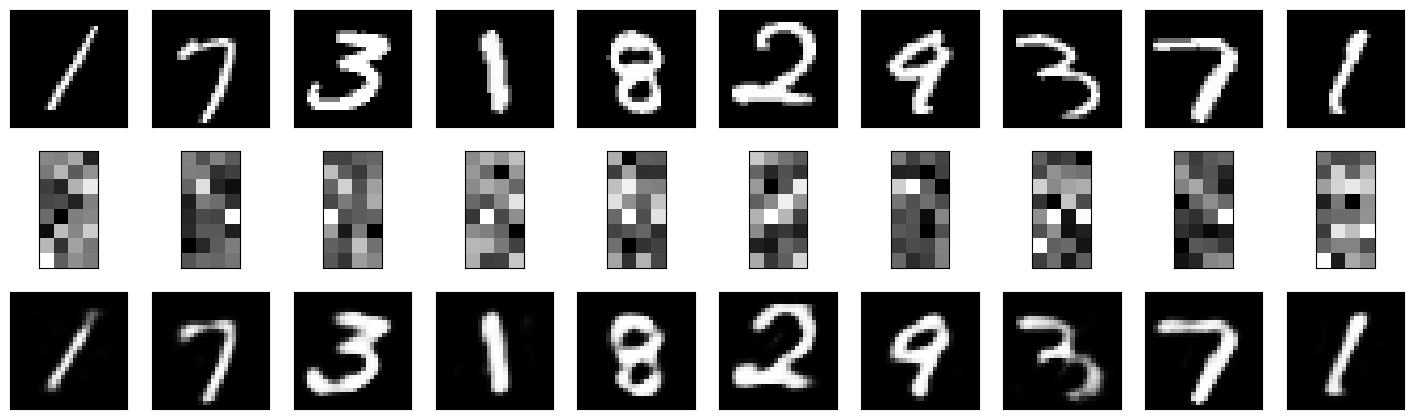

In [21]:
images_number = 10
test_images = np.random.randint(X_test.shape[0], size=images_number)
plt.figure(figsize=(18, 18))
for i, index_image in enumerate(test_images):
    
    # Original image
    ax = plt.subplot(10, 10, i + 1)
    plt.imshow(X_test[index_image].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Coded image
    ax = plt.subplot(10, 10, i + 1 + images_number)
    plt.imshow(images_coded[index_image].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Decoded image
    ax = plt.subplot(10, 10, i + 1 + images_number * 2)
    plt.imshow(images_decoded[index_image].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)